# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

zsh:1: /Users/yben409/Desktop/work/A.E/Cactus infecté ou non infecté/tensorflow_env/bin/pip: bad interpreter: /Users/yben409/tensorflow-test/env/bin/python3.8: no such file or directory


In [2]:
!pip list

zsh:1: /Users/yben409/Desktop/work/A.E/Cactus infecté ou non infecté/tensorflow_env/bin/pip: bad interpreter: /Users/yben409/tensorflow-test/env/bin/python3.8: no such file or directory


In [30]:
import tensorflow as tf
import os

In [31]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [32]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [33]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [34]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install imghdr

In [36]:
import cv2
import imghdr

In [37]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Check for TensorFlow GPU access
print(tf.config.list_physical_devices())

# See TensorFlow version
print(tf.__version__)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.13.0


In [38]:
data_dir = 'data' 

In [40]:
os.listdir(os.path.join(data_dir, 'x infecte'))[:5]

['IMG20181023143336.jpg',
 'IMG20181029133107.jpg',
 'IMG20181023140830.jpg',
 'IMG20181029130817.jpg',
 'IMG20181023132040.jpg']

In [41]:
img_path = os.path.join(data_dir, 'x infecte','IMG20181023132040.jpg')
img = cv2.imread(img_path)

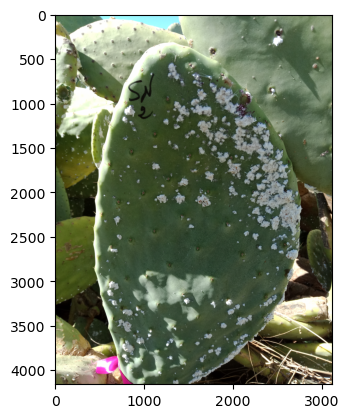

In [42]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [43]:
image_exts = ['jpeg','jpg','JPG' 'bmp', 'png']

In [45]:
for image_class in os.listdir(data_dir): 
    if image_class != '.DS_Store':
        print(image_class)

x infecte
non infecte
infecté:non infectë.zip


In [46]:
os.listdir(data_dir)

['.DS_Store', 'x infecte', 'non infecte', 'infecté:non infectë.zip']

In [47]:
j = ['.DS_Store', 'non infecte', 'x infecte', 'infecté:non infectë.zip']

In [48]:
for image_class in j: 
    if (image_class != '.DS_Store') and (image_class != 'infecté:non infectë.zip'):
        for image in os.listdir(os.path.join(data_dir, image_class)):
            if image != '.DS_Store':
                image_path = os.path.join(data_dir, image_class, image)
                try: 
                    img = cv2.imread(image_path)
                    tip = imghdr.what(image_path)
                    if tip not in image_exts: 
                        print('Image not in ext list {}'.format(image_path))
                        os.remove(image_path)
                except Exception as e: 
                    print('Issue with image {}'.format(image_path))
                    # os.remove(image_path)

# 3. Load Data

In [49]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [51]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 656 files belonging to 2 classes.


In [52]:
data_iterator = data.as_numpy_iterator()

In [53]:
batch = data_iterator.next()

In [54]:
batch[1]

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

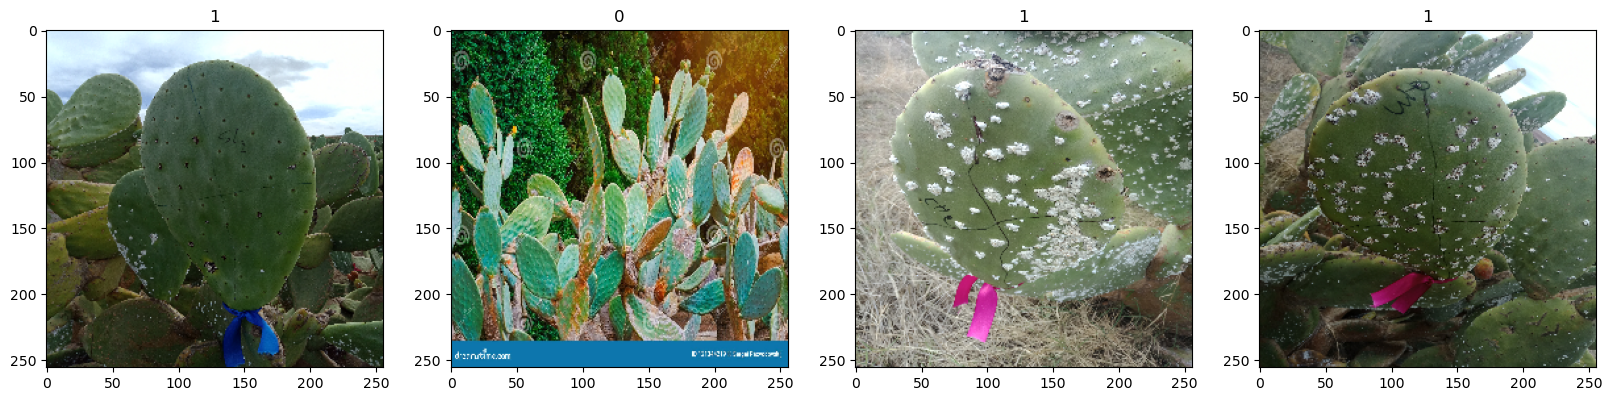

In [55]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [56]:
data = data.map(lambda x,y: (x/255, y))

In [57]:
data.as_numpy_iterator().next()

(array([[[[3.62591922e-01, 3.89062494e-01, 3.48376215e-01],
          [5.40579021e-01, 5.70312500e-01, 5.48743844e-01],
          [4.70603555e-01, 4.71246928e-01, 4.51562494e-01],
          ...,
          [4.69852954e-01, 4.85431999e-01, 4.60830271e-01],
          [4.98789817e-01, 5.25428951e-01, 5.07276356e-01],
          [4.62469369e-01, 4.83808219e-01, 4.69914228e-01]],
 
         [[4.59497541e-01, 4.29840684e-01, 3.64430159e-01],
          [6.50796592e-01, 6.39031887e-01, 6.10600471e-01],
          [4.27588850e-01, 4.26164210e-01, 3.87423396e-01],
          ...,
          [4.59267765e-01, 4.90747541e-01, 4.31709558e-01],
          [4.35661763e-01, 4.90563720e-01, 4.24877465e-01],
          [3.69224876e-01, 4.36381727e-01, 3.66773903e-01]],
 
         [[4.97931987e-01, 5.06311297e-01, 4.72212017e-01],
          [5.40916026e-01, 5.84053338e-01, 5.52680731e-01],
          [4.69117641e-01, 5.20098031e-01, 4.84803915e-01],
          ...,
          [4.35646445e-01, 4.71308202e-01, 3.9667

# 5. Split Data

In [60]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)

In [61]:
train_size

16

In [62]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [63]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [65]:
model = Sequential()

In [66]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [67]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [69]:
logdir='logs'

In [70]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [71]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2024-05-07 23:28:11.212094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - ETA: 0s - loss: 1.1594 - accuracy: 0.5195

2024-05-07 23:28:20.535287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 18s 902ms/step - loss: 1.1594 - accuracy: 0.5195 - val_loss: 0.7631 - val_accuracy: 0.5469
Epoch 2/20
16/16 [==============================] - 16s 845ms/step - loss: 0.6706 - accuracy: 0.6074 - val_loss: 0.5196 - val_accuracy: 0.7188
Epoch 3/20
16/16 [==============================] - 16s 830ms/step - loss: 0.6594 - accuracy: 0.5527 - val_loss: 0.6213 - val_accuracy: 0.7812
Epoch 4/20
16/16 [==============================] - 16s 817ms/step - loss: 0.6332 - accuracy: 0.5566 - val_loss: 0.6037 - val_accuracy: 0.6875
Epoch 5/20
16/16 [==============================] - 16s 813ms/step - loss: 0.4821 - accuracy: 0.8203 - val_loss: 0.4118 - val_accuracy: 0.8281
Epoch 6/20
16/16 [==============================] - 16s 826ms/step - loss: 0.4340 - accuracy: 0.8145 - val_loss: 0.4539 - val_accuracy: 0.7656
Epoch 7/20
16/16 [==============================] - 16s 822ms/step - loss: 0.4134 - accuracy: 0.8027 - val_loss: 0.3305 - val_accuracy: 0.8750
Epoch 8/20

# 8. Plot Performance

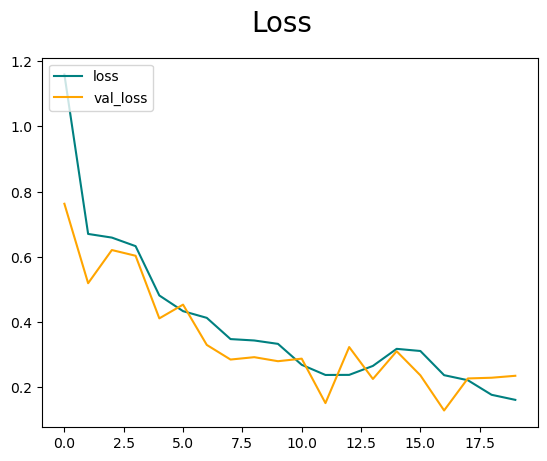

In [72]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

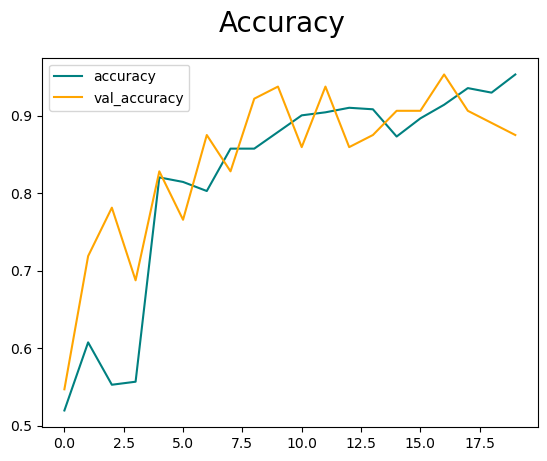

In [73]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [74]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [75]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [76]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 119ms/step


2024-05-07 23:34:24.781272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 21ms/step


In [77]:
from sklearn.metrics import confusion_matrix
import numpy as np

num_classes = 2
threshold = 0.7

conf_matrix = np.zeros((num_classes, num_classes), dtype=np.int32)

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    # Convert probabilities to predicted class labels
    yhat_labels = (yhat > threshold).astype(np.int)
    
    # Update confusion matrix
    conf_matrix += confusion_matrix(y, yhat_labels, labels=np.arange(num_classes))

1/1 [==============================] - 0s 13ms/step


/var/folders/3f/9ys0fdcd4lvb_2mh2cqr6hjm0000gq/T/ipykernel_5081/2545335030.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  yhat_labels = (yhat > threshold).astype(np.int)
/var/folders/3f/9ys0fdcd4lvb_2mh2cqr6hjm0000gq/T/ipykernel_5081/2545335030.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

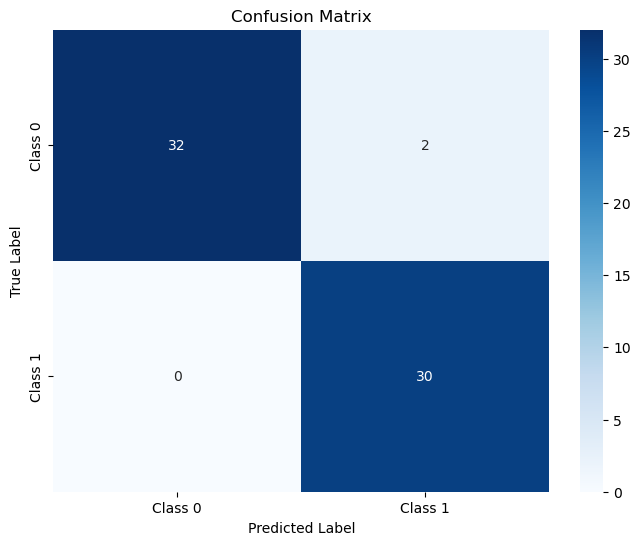

In [78]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 10. Test

In [9]:
import cv2
import matplotlib.pyplot as plt

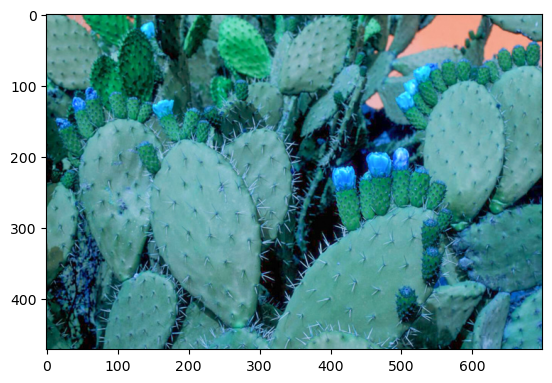

In [14]:
img = cv2.imread('test_pics/cactus_non_infecte.jpeg')
plt.imshow(img)
plt.show()

In [15]:
import tensorflow as tf

In [20]:
model = load_model('models/imageclassifier.h5')

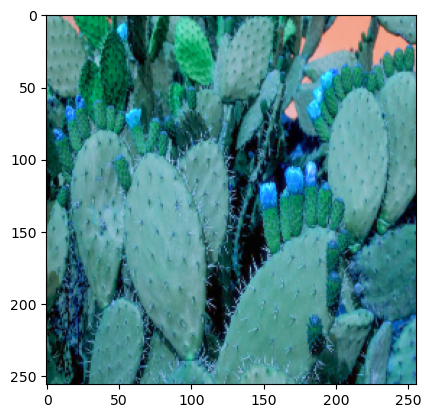

In [21]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [22]:
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)

1/1 [==============================] - 0s 283ms/step
[[0.9985268]]


2024-07-07 23:44:48.956549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


# 11. Save the Model

In [2]:
from tensorflow.keras.models import load_model

In [56]:
model.save(os.path.join('models','imageclassifier.h5'))

/Users/yben409/Desktop/work/A.E/Images avec phases d'infection/tensorflow_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
model = load_model('models/imageclassifier.h5')

In [19]:
import numpy as np

In [24]:
model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 14ms/step


array([[0.0111809]], dtype=float32)

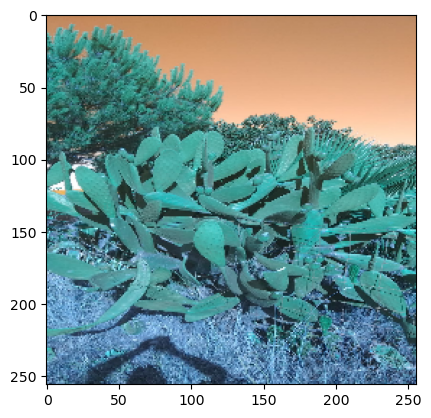

1/1 [==============================] - 0s 14ms/step
Predicted class is Infectious


In [28]:
img = cv2.imread('test_pics/WhatsApp Image 2024-07-07 at 19.21.16.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = new_model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.7: 
    print(f'Predicted class is Healthy')
else:
    print(f'Predicted class is Infectious')